In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from scipy.signal import butter, lfilter

In [2]:
# Настройки отображения графиков
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [4]:
audioFile = wave.open("C:\\Users\\Админ\\Desktop\\white noise.wav", "rb")
signal = audioFile.readframes(-1)
signal = np.fromstring(signal, "int16")

C:\Users\Админ\AppData\Local\Temp\ipykernel_10340\1953991608.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal = np.fromstring(signal, "int16")


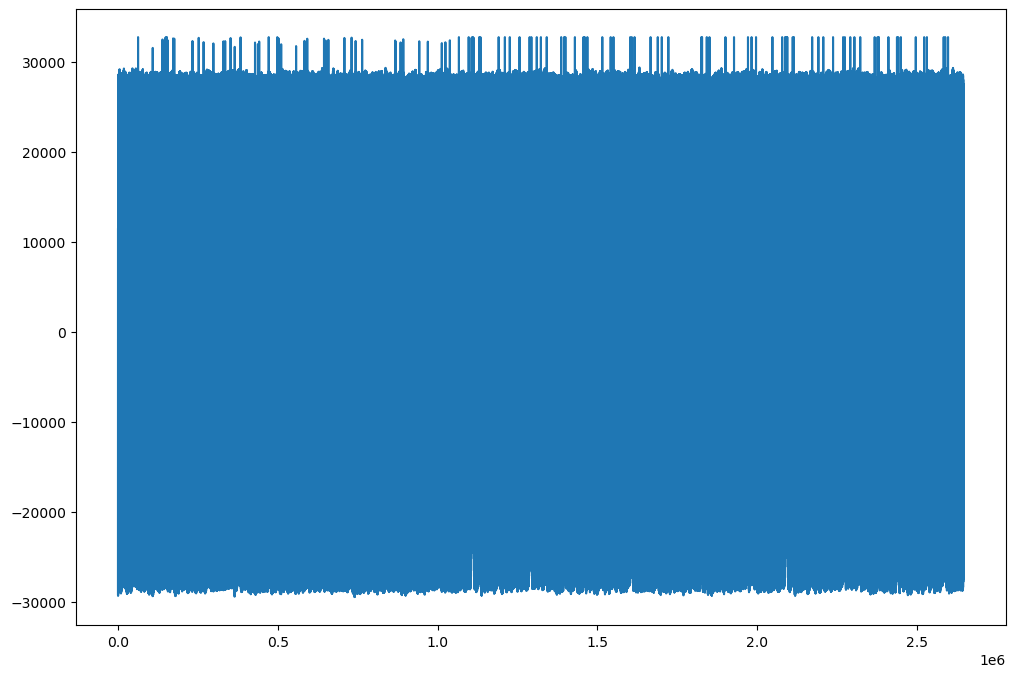

In [5]:
plt.plot(signal)
plt.show()

In [6]:
fs = audioFile.getframerate()
spectrum = np.fft.rfft(signal)
amplitude = np.abs(2 * spectrum / len(signal))
frequency =  np.fft.rfftfreq(len(signal), 1/fs)

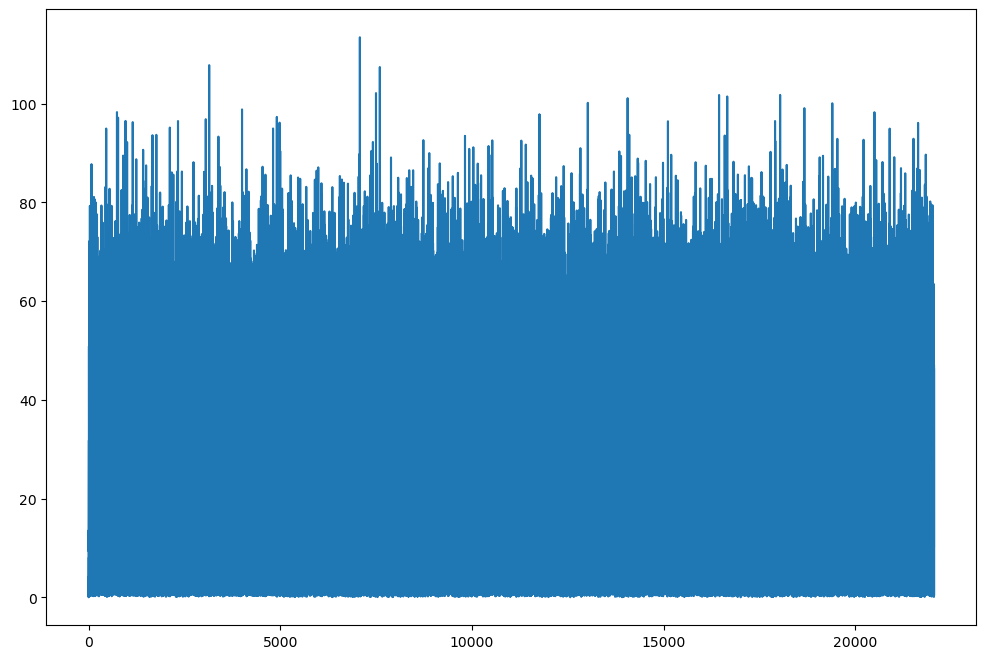

In [7]:
plt.plot(frequency, amplitude)
plt.show()

In [8]:
fc = 1000
b, a = butter(3, fc, fs=fs, btype="low")
filteredSignal = lfilter(b, a, signal)

In [9]:
filteredSpectrum = np.fft.rfft(filteredSignal)
filteredAmplitude = np.abs(2 * filteredSpectrum / len(filteredSignal))
filteredFrequency =  np.fft.rfftfreq(len(filteredSignal), 1/fs)

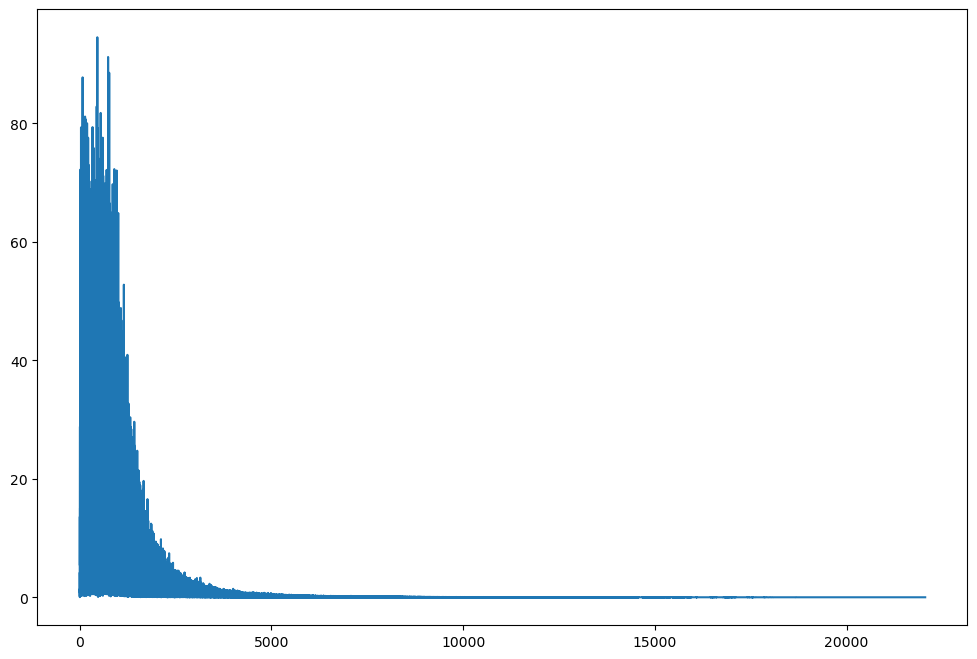

In [10]:
plt.plot(filteredFrequency, filteredAmplitude)
plt.show()

In [11]:
filteredAudioFile = wave.open("C:\\Users\\Админ\\Desktop\\filtered white noise.wav", "wb")
filteredAudioFile.setnchannels(audioFile.getnchannels())
filteredAudioFile.setsampwidth(audioFile.getsampwidth())
filteredAudioFile.setframerate(audioFile.getframerate())
filteredAudioFile.writeframes(filteredSignal.tobytes())

In [12]:
filteredAudioFile.close()
audioFile.close()